In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files

# You might want to upload the files using the Colab interface first.
# Click on the "Files" icon on the left sidebar and then "Upload".

all_data = []
for i in range(15, 22):
    file_name = f"players_{i}.csv"
    try:
        df = pd.read_csv(file_name)
        # Select the feature you want to predict (change 'overall' if needed)
        data = df[['overall']].values
        all_data.append(data)
        print(f"Loaded and processed {file_name}")
    except FileNotFoundError:
        print(f"Error: File not found: {file_name}. Make sure you have uploaded it.")

# Combine all the data into a single array
all_data = np.concatenate(all_data, axis=0)

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(all_data)

print("Data loading and preprocessing complete.")

Loaded and processed players_15.csv
Loaded and processed players_16.csv
Loaded and processed players_17.csv
Loaded and processed players_18.csv
Loaded and processed players_19.csv
Loaded and processed players_20.csv
Loaded and processed players_21.csv
Data loading and preprocessing complete.


In [ ]:
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length)])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 50
X, y = create_sequences(scaled_data, sequence_length)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

print(f"Shape of training sequences (X_train): {X_train.shape}")
print(f"Shape of training targets (y_train): {y_train.shape}")
print(f"Shape of testing sequences (X_test): {X_test.shape}")
print(f"Shape of testing targets (y_test): {y_test.shape}")

Shape of training sequences (X_train): (98232, 50, 1)
Shape of training targets (y_train): (98232, 1)
Shape of testing sequences (X_test): (24559, 50, 1)
Shape of testing targets (y_test): (24559, 1)


In [ ]:
model = Sequential()

# First LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))

# Second LSTM layer
model.add(LSTM(units=50, return_sequences=False))

# Output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 100
batch_size = 32  # You can adjust this

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=1)

print("Model training complete.")

Epoch 1/100
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 137s 48ms/step - loss: 0.0035 - val_loss: 8.2288e-06
Epoch 2/100
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 143s 49ms/step - loss: 1.3710e-04 - val_loss: 6.0061e-07
Epoch 3/100
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 139s 47ms/step - loss: 5.9432e-05 - val_loss: 5.3879e-05
Epoch 4/100
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 142s 47ms/step - loss: 6.4860e-05 - val_loss: 6.3923e-07
Epoch 5/100
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 132s 48ms/step - loss: 7.2847e-05 - val_loss: 1.4671e-06
Epoch 6/100
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 146s 49ms/step - loss: 7.6661e-05 - val_loss: 5.4399e-07
Epoch 7/100
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 136s 47ms/step - loss: 3.4237e-05 - val_loss: 4.1907e-07
Epoch 8/100
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 142s 47ms/step - loss: 8.5599e-05 - val_loss: 5.4329e-07
Epoch 9/100
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 143s 48ms/step - loss: 7.1829e-05 - val_loss: 3.9824e-07
Epoch 10/100
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 141s 48ms/step - loss: 4.0744e-05 - val_loss: 4.6209e-07
Epo

768/768 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step
Mean Squared Error on the test set: 0.0850


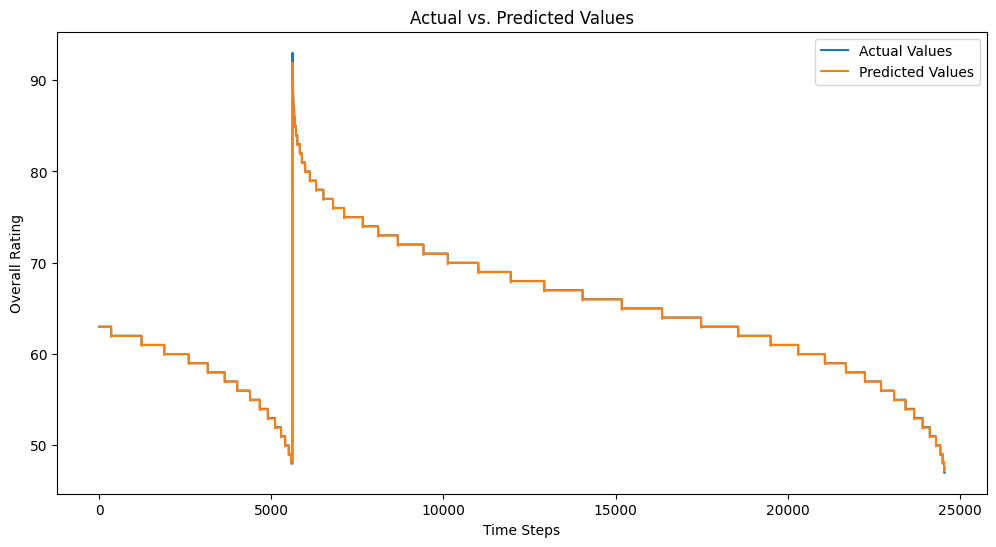

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Make predictions on the test data
predicted_scaled = model.predict(X_test)

# Inverse transform the predictions and actual values
predicted = scaler.inverse_transform(predicted_scaled)
actual = scaler.inverse_transform(y_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(actual, predicted)
print(f'Mean Squared Error on the test set: {mse:.4f}')

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual Values')
plt.plot(predicted, label='Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Overall Rating')
plt.legend()
plt.show()